# Is it a Bird?

## Install Dependencies

In [ ]:
!pip install -Uqq fastai

In [ ]:
!pip install -Uqq fastbook

In [ ]:
# Import fast.ai dependencies
from fastcore.all import *
from fastdownload import download_url
from fastai.vision.all import *
from fastbook import *

# import utilities
import time
import os
import pathlib
import shutil

#Mount Google Drive
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


In [ ]:
%pwd

'/content'

# Test Image Download Function

In [ ]:
#using Fastbook Duck Duck Go image download function
urls = search_images_ddg('bird photos', max_images=1)
urls[0]

'http://getwallpapers.com/wallpaper/full/4/d/8/1255731-large-blue-bird-wallpaper-2244x1924-photo.jpg'

In [ ]:
def get_image(search_term, num_images, destination):
    download_url(search_images_ddg(search_term, max_images=num_images)[0], destination, show_progress=False)
    return Image.open(destination).to_thumb(256,256)

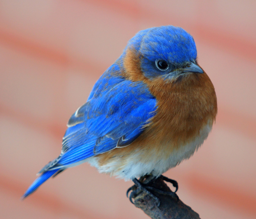

In [ ]:
bird_path = '/content/drive/MyDrive/Colab Notebooks/FastaiCourseData/Lesson_1/bird_test.jpg'
bird_test = get_image('bird photos', 1, bird_path)
bird_test

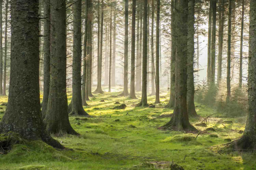

In [ ]:
forest_path = '/content/drive/MyDrive/Colab Notebooks/FastaiCourseData/Lesson_1/forest_test.jpg'
forest_test = get_image('forest photos', 1, forest_path)
forest_test

# Download Images for Multiple Image Categories



In [ ]:
# Download images of different image categories and save
def download_images_ddg(img_category, img_type, path, num_images):
    if not path.exists():
        path.mkdir()
        for o in img_types:
            dest = (path/o)
            dest.mkdir(exist_ok=True)
            results = search_images_ddg(f'{str(o)} photos', max_images=num_images)
            for u in range(len(results)):
                try:
                    download_url(url=results[u],
                                 dest=f'{dest}/{str(o)}-{str(u+1)}.jpg',
                                 timeout=10,
                                 show_progress=False)
                except:
                    print(f'not found {results[u]}')
                    continue

In [ ]:
# Define image category and image types and pth to storage location
img_category = 'bird_forest'
img_types = ['bird','forest']
lesson_path = '/content/drive/MyDrive/Colab Notebooks/FastaiCourseData/Lesson_1/'
path = Path(f'{lesson_path}/{img_category}')

In [ ]:
# Call function to download images for each image type
for img_type in img_types:
 download_images_ddg(img_category, img_type, path, num_images=100)

In [ ]:
# Check for failed images
fns = get_image_files(path)
failed = verify_images(fns)
failed.map(Path.unlink);
len(failed)

0

# Dataloder using a DataBlock

In [ ]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=32)

dls.show_batch(max_n=24)

Output hidden; open in https://colab.research.google.com to view.

# Implement Learning Model

In [ ]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 75.1MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,0.775699,0.417805,0.184211,00:26


epoch,train_loss,valid_loss,error_rate,time
0,0.074223,0.017926,0.000000,00:20
1,0.036758,0.002433,0.000000,00:21
2,0.023688,0.002039,0.000000,00:22


# Check Model With Sample

This is a: bird.
Probability it's a bird: 1.0000


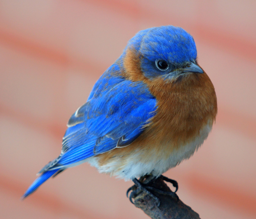

In [ ]:
is_bird,_,probs = learn.predict(PILImage.create(bird_path))
#print(f"This is a: {is_bird}.")
#print(f"Probability it's a bird: {probs[0]:.4f}")
print(f"This is a: {is_bird}.")
if _ == 1:
  #print(_ == 1)
  print(f"Probability it's a forest: {probs[1]:.4f}")
else:
  print(f"Probability it's a bird: {probs[0]:.4f}")
bird_test

This is a: forest.
Probability it's a forest: 1.0000


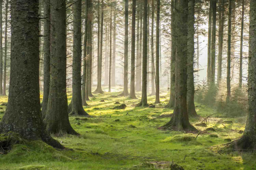

In [ ]:
is_bird,_,probs = learn.predict(PILImage.create(forest_path))
print(f"This is a: {is_bird}.")
if _ == 1:
  #print(_ == 1)
  print(f"Probability it's a forest: {probs[1]:.4f}")
else:
  print(f"Probability it's a bird: {probs[0]:.4f}")
forest_test

# Delete Files and Folders

In [ ]:
#%pwd

In [ ]:
#%ls

shell-init: error retrieving current directory: getcwd: cannot access parent directories: Transport endpoint is not connected
ls: cannot open directory '.': Transport endpoint is not connected


In [ ]:
#%cd ..

In [ ]:
#%cd drive/MyDrive/Colab Notebooks/FastaiCourse/Lesson_1

In [ ]:
#shutil.rmtree('bird_forest')